MAKING SYSTEM WISE PLOTS

<ipython-input-15-1c8d82bebd13>:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


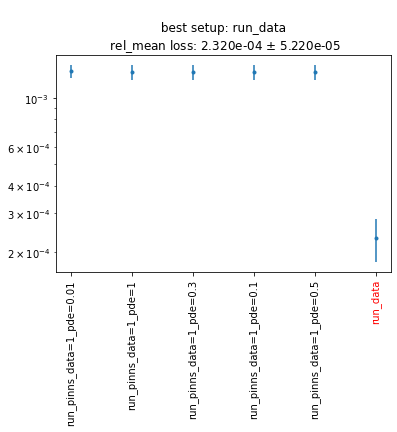

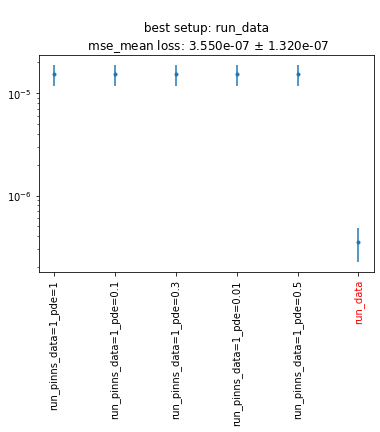

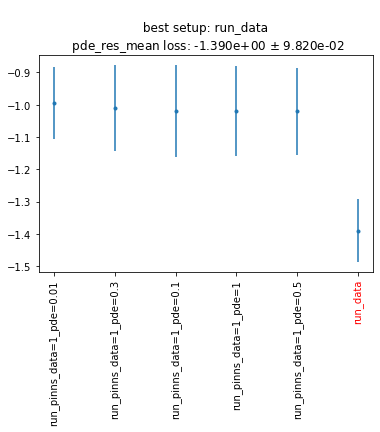

ValueError: attempt to get argmin of an empty sequence

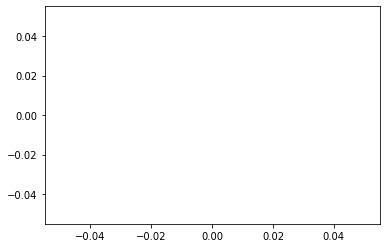

In [15]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle
import pandas as pd
# main_path = '/data/divyam123/slurm_runs_new_residual/results_noether_summer/1d_advection_new_params/baseline_4k_new_residual_15/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/slurm_runs_new_residual/results_noether_summer/1d_diffusion_reaction_multiparam_new/baseline_4k_new_residual_15/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/slurm_runs_new_residual/results_noether_summer/1d_burgers_new_params_clean/baseline_4k_new_residual_15/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/ckpt/seed={}/trajectory_restriction_baseline'
# main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/ckpt/seed={}/trajectory_restriction_baseline'

# main_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/pinns_sweep_baseline_15_new_res/seed={}/param_no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/pinns_sweep_baseline_15_new_res/seed={}/param_no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/pinns_sweep_baseline_15_new_res/seed={}/param_no_norm_steps=5'

# main_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/pinns_sweep_baseline_2_new_res/seed={}/param_no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/pinns_sweep_baseline_2_new_res/seed={}/param_no_norm_steps=5'
# main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/pinns_sweep_baseline_2_new_res/seed={}/param_no_norm_steps=5'

# main_path = '/data/divyam123/slurm_runs_lr_sweep/results_noether_summer/1d_burgers_new_params_clean/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/slurm_runs_lr_sweep/results_noether_summer/1d_advection_new_params/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/slurm_runs_lr_sweep/results_noether_summer/1d_diffusion_reaction_multiparam_new/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# main_path = '/data/divyam123/slurm_runs_pinns/pinns_sweep/1d_advection_new_params/baseline_4k/seed={}/param_no_norm_steps=5'
main_path = '/data/divyam123/slurm_runs_pinns/pinns_sweep/1d_diffusion_reaction_multiparam_new/baseline_4k/seed={}/param_no_norm_steps=5'
setup_results = dict()
final_results = dict()
for seed in [0,1,2]:
    setups = os.listdir(main_path.format(seed))


    for setup in setups:
        if 'param+residual' not in setup and 'param_residual' not in setup and 'residual_param' not in setup:# and 'shift' not in setup:# and 'param_loss_init_frames' not in setup and 'residual_loss_init_frames' not in setup: #and 'learned' not in setup:
            if setup not in setup_results:
                setup_results[setup] = {'mse_mean':[],'rel_mean':[],'pde_res_mean':[]}
            setup_path = os.path.join(main_path.format(seed),setup,'final')
            with open(os.path.join(setup_path,'saved_dictionary.pkl'), 'rb') as saved_dict:
                results = pickle.load(saved_dict)
                for key in setup_results[setup].keys():
                    if key in results:
                        setup_results[setup][key].append(results[key])
                    

for setup in setup_results:
    final_results[setup] = {key:'' for key in setup_results[setup]}
    for key in setup_results[setup].keys():
        final_results[setup][key] = f'{np.mean(setup_results[setup][key]):0.3} +- {np.std(setup_results[setup][key]):0.3}'

for loss_type in ['rel_mean','mse_mean','pde_res_mean','r2']:
    x = []
    y = []
    e = []
    for setup in final_results:
        # if (loss_type not in ['param_init_mean','param_fold_increase','r2']) or (loss_type in ['param_init_mean','param_fold_increase','r2'] and 'pinn' not in setup and 'pino' not in setup and 'true' not in setup):
        if loss_type in final_results[setup]:
            x.append(setup[:])
            # y.append(float(final_results[setup][loss_type]).split(' +- ')[0])
            # e.append(float(final_results[setup][loss_type]).split(' +- ')[1])
            y.append(float(final_results[setup][loss_type].split(' +- ')[0]))
            e.append(float(final_results[setup][loss_type].split(' +- ')[1]))
    sorted_idx = np.argsort(y)
    if loss_type == 'r2':
        sorted_idx = np.flip(sorted_idx)
    x = [x[i] for i in sorted_idx]
    x.reverse()
    y = [y[i] for i in sorted_idx]
    y.reverse()
    e = [e[i] for i in sorted_idx]
    e.reverse()
    # print(x,y,e)
    plt.figure()
    ax = plt.subplot(111)
    ax.errorbar(x, y, e, linestyle='None', marker='.')
    ax.set_title(f'\n best setup: {x[np.argmin(y)]} \n {loss_type} loss: {min(y):.3e} $\pm$ {e[np.argmin(y)]:.3e}')
    if loss_type != 'pde_res_mean' and loss_type != 'r2':
        ax.set_yscale('log')
    ax.set_xticklabels(x, rotation = 90)
    for tick in ax.get_xticklabels():
        if 'data' in tick.get_text():
            if 'param' in tick.get_text() and 'init_frames' not in tick.get_text():
                tick.set_color('green')
            elif 'residual' in tick.get_text() and 'init_frames' not in tick.get_text():
                tick.set_color('blue')
            elif 'init_frames' in tick.get_text() and ('residual' not in tick.get_text()) and ('param' not in tick.get_text()):
                tick.set_color('purple')
            elif 'init_frames' in tick.get_text() and ('residual' in tick.get_text()) or ('param' in tick.get_text()):
                tick.set_color('brown')
            else:
                tick.set_color('black')
            if 'run_data' == tick.get_text():
                tick.set_color('red')
        else:
            tick.set_color('red')
    plt.show()

<ipython-input-10-f5404943c751>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


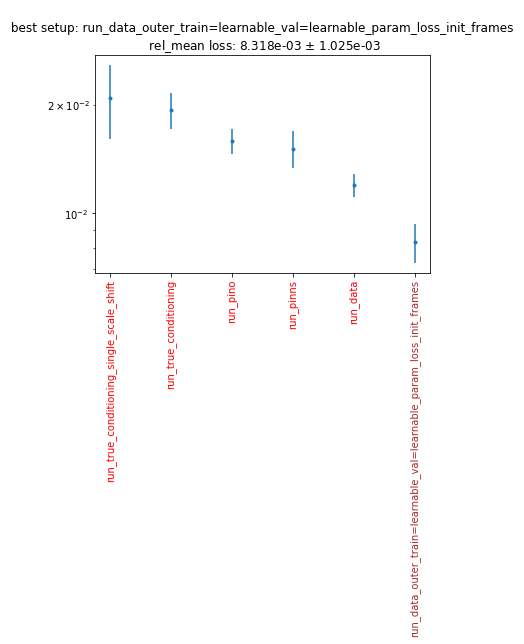

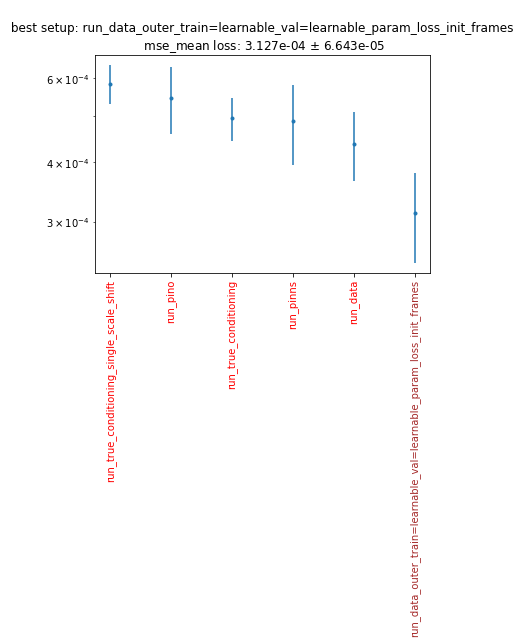

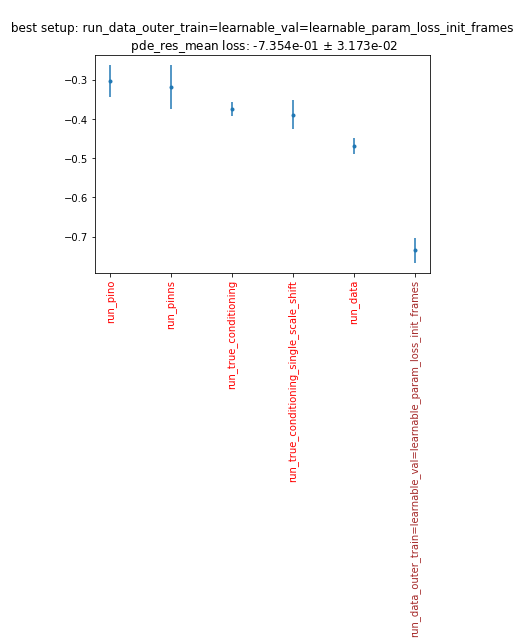

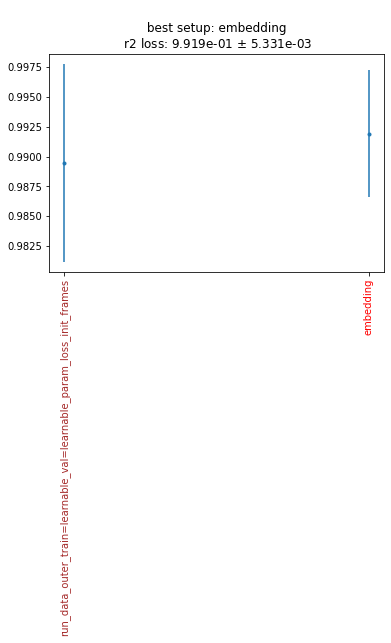

Data Only & $1.201 \times 10^{-2} \pm 8.85 \times 10^{-4}$ & $3.409 \times 10^{-1} \pm 1.56 \times 10^{-2}$ & - \\
\hline
Data + Parameter Conditioning & $1.936 \times 10^{-2} \pm 2.23 \times 10^{-3}$ & $4.225 \times 10^{-1} \pm 1.75 \times 10^{-2}$ & - \\
\hline
Data + PDE Soft Constraint & $1.515 \times 10^{-2} \pm 1.77 \times 10^{-3}$ & $4.848 \times 10^{-1} \pm 6.42 \times 10^{-2}$ & - \\
\hline
Data + PDE Soft Constraint + Test-Time Tailoring & $1.593 \times 10^{-2} \pm 1.28 \times 10^{-3}$ & $5.002 \times 10^{-1} \pm 4.55 \times 10^{-2}$ & - \\
\hline
Meta-Tailoring (ours) & $8.318 \times 10^{-3} \pm 1.02 \times 10^{-3}$ & $1.844 \times 10^{-1} \pm 1.31 \times 10^{-2}$ & $9.895 \times 10^{-1} \pm 8.27 \times 10^{-3}$ \\
\hline
Supervised Inverse Model Training & - & - & $9.919 \times 10^{-1} \pm 5.33 \times 10^{-3}$ \\
\hline


In [10]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle
import pandas as pd

# main_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/pinns_sweep_baseline_15_2k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/pinns_sweep_baseline_15_2k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/pinns_sweep_baseline_15_2k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'

# main_path = '/data/divyam123/slurm_runs_new_residual/results_noether_summer/1d_advection_new_params/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/slurm_runs_new_residual/results_noether_summer/1d_diffusion_reaction_multiparam_new/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'


# main_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'

main_path = '/data/divyam123/slurm_runs_fixed_outer_residual/results_noether_summer/1d_advection_new_params/baseline_4k/seed={}/no_norm_steps=5'
embedding_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/slurm_runs_fixed_outer_residual/results_noether_summer/1d_burgers_new_params_clean/baseline_4k_new_residual/seed={}/no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
# main_path = '/data/divyam123/slurm_runs_fixed_outer_residual/results_noether_summer/1d_diffusion_reaction_multiparam_new/baseline_4k_new_residual/seed={}/param_no_norm_steps=5'
# embedding_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'


setup_results = dict()
final_results = dict()
for seed in [0,1,2]:
    setups = os.listdir(main_path.format(seed))
    embedding = os.listdir(embedding_path.format(seed))
    embedding_dict = None

    with open(os.path.join(os.path.join(embedding_path.format(seed),'final'),'saved_dictionary.pkl'), 'rb') as saved_dict:
        embedding_dict = pickle.load(saved_dict)

    for setup in setups:
        if 'param+residual' not in setup and 'param_residual' not in setup and 'residual_param' not in setup and 'sgd' not in setup:# and 'shift' not in setup:# and 'param_loss_init_frames' not in setup and 'residual_loss_init_frames' not in setup: #and 'learned' not in setup:
            if setup not in setup_results:
                if 'data' in setup and setup != 'run_data':
                    setup_results[setup] = {'mse_mean':[],'rel_mean':[],'pde_res_mean':[],'param_init_mean':[],'param_fold_increase':[],'r2':[]}
                else:
                    setup_results[setup] = {'mse_mean':[],'rel_mean':[],'pde_res_mean':[]}
            setup_path = os.path.join(main_path.format(seed),setup,'final')
            with open(os.path.join(setup_path,'saved_dictionary.pkl'), 'rb') as saved_dict:
                results = pickle.load(saved_dict)
                for key in setup_results[setup].keys():
                    if key in results:
                        setup_results[setup][key].append(results[key])
                    if key == 'param_fold_increase' and 'param_init_mean' in results:
                        setup_results[setup]['param_fold_increase'].append(results['param_init_mean'] / embedding_dict['val_nu_loss'])

    if 'embedding' not in setup_results:     
        setup_results['embedding'] = {'param_init_mean':[],'param_fold_increase':[],'r2':[]}
    setup_results['embedding']['param_init_mean'].append(embedding_dict['val_nu_loss'])
    setup_results['embedding']['param_fold_increase'].append(embedding_dict['val_nu_loss'] / embedding_dict['val_nu_loss'])
    setup_results['embedding']['r2'].append(embedding_dict['r2'])

for setup in setup_results:
    final_results[setup] = {key:'' for key in setup_results[setup]}
    for key in setup_results[setup].keys():
        final_results[setup][key] = f'{np.mean(setup_results[setup][key])} +- {np.std(setup_results[setup][key])}'
['rel_mean','pde_res_mean','param_init_mean','param_fold_increase','r2']
for loss_type in ['rel_mean','mse_mean','pde_res_mean','r2']:
    x = []
    y = []
    e = []
    for setup in final_results:
        # if (loss_type not in ['param_init_mean','param_fold_increase','r2']) or (loss_type in ['param_init_mean','param_fold_increase','r2'] and 'pinn' not in setup and 'pino' not in setup and 'true' not in setup):
        if loss_type in final_results[setup]:
            x.append(setup[:])
            # y.append(float(final_results[setup][loss_type]).split(' +- ')[0])
            # e.append(float(final_results[setup][loss_type]).split(' +- ')[1])
            y.append(float(final_results[setup][loss_type].split(' +- ')[0]))
            e.append(float(final_results[setup][loss_type].split(' +- ')[1]))
    sorted_idx = np.argsort(y)
    if loss_type == 'r2':
        sorted_idx = np.flip(sorted_idx)
    x = [x[i] for i in sorted_idx]
    x.reverse()
    y = [y[i] for i in sorted_idx]
    y.reverse()
    e = [e[i] for i in sorted_idx]
    e.reverse()
    # print(x,y,e)
    plt.figure()
    ax = plt.subplot(111)
    ax.errorbar(x, y, e, linestyle='None', marker='.')
    if loss_type != 'r2':
        ax.set_title(f'\n best setup: {x[np.argmin(y)]} \n {loss_type} loss: {min(y):.3e} $\pm$ {e[np.argmin(y)]:.3e}')
    else:
        ax.set_title(f'\n best setup: {x[np.argmax(y)]} \n {loss_type} loss: {max(y):.3e} $\pm$ {e[np.argmax(y)]:.3e}')
    if loss_type != 'pde_res_mean' and loss_type != 'r2':
        ax.set_yscale('log')
    ax.set_xticklabels(x, rotation = 90)
    for tick in ax.get_xticklabels():
        if 'data' in tick.get_text():
            if 'param' in tick.get_text() and 'init_frames' not in tick.get_text():
                tick.set_color('green')
            elif 'residual' in tick.get_text() and 'init_frames' not in tick.get_text():
                tick.set_color('blue')
            elif 'init_frames' in tick.get_text() and ('residual' not in tick.get_text()) and ('param' not in tick.get_text()):
                tick.set_color('purple')
            elif 'init_frames' in tick.get_text() and ('residual' in tick.get_text()) or ('param' in tick.get_text()):
                tick.set_color('brown')
            else:
                tick.set_color('black')
            if 'run_data' == tick.get_text():
                tick.set_color('red')
        else:
            tick.set_color('red')
    plt.show()
for setup in setup_results:
    final_results[setup] = {key:'' for key in setup_results[setup]}
    for key in setup_results[setup].keys():
        if key != 'pde_res_mean':

            result_mean = f'{np.mean(setup_results[setup][key]):.03e}'.split('e')
            result_mean = f'{result_mean[0]} \\times 10^{{{int(result_mean[1])}}}'#.format(int(result_mean[1]))
            result_std = f'{np.std(setup_results[setup][key]):.02e}'.split('e')
            result_std = f'{result_std[0]} \\times 10^{{{int(result_std[1])}}}'#.format(int(result_mean[1]))
            final_results[setup][key] = f'${result_mean} \pm {result_std}$'
        else:
            vals = [10 ** val for val in setup_results[setup][key]]
            result_mean = f'{np.mean(vals):.03e}'.split('e')
            result_mean = f'{result_mean[0]} \\times 10^{{{int(result_mean[1])}}}'#.format(int(result_mean[1]))
            result_std = f'{np.std(vals):.02e}'.split('e')
            result_std = f'{result_std[0]} \\times 10^{{{int(result_std[1])}}}'#.format(int(result_mean[1]))
            final_results[setup][key] = f'${result_mean} \pm {result_std}$'

# display(pd.DataFrame.from_dict(final_results, orient='index'))
if '1d_burgers' not in main_path:
    print('Data Only','&',final_results['run_data']['rel_mean'],'&',final_results['run_data']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + Parameter Conditioning','&',final_results['run_true_conditioning']['rel_mean'],'&',final_results['run_true_conditioning']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + PDE Soft Constraint','&',final_results['run_pinns']['rel_mean'],'&',final_results['run_pinns']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + PDE Soft Constraint + Test-Time Tailoring','&',final_results['run_pino']['rel_mean'],'&',final_results['run_pino']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Meta-Tailoring (ours)','&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['rel_mean'],'&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['pde_res_mean'],'&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['r2'],'\\\\')
    print('\hline')
    print('Supervised Inverse Model Training & - & - &',final_results['embedding']['r2'],'\\\\')
    print('\hline')
else:
    print('Data Only','&',final_results['run_data']['mse_mean'],'&',final_results['run_data']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + Parameter Conditioning','&',final_results['run_true_conditioning']['mse_mean'],'&',final_results['run_true_conditioning']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + PDE Soft Constraint','&',final_results['run_pinns']['mse_mean'],'&',final_results['run_pinns']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Data + PDE Soft Constraint + Test-Time Tailoring','&',final_results['run_pino']['mse_mean'],'&',final_results['run_pino']['pde_res_mean'],'&','- \\\\')
    print('\hline')
    print('Meta-Tailoring (ours)','&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['mse_mean'],'&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['pde_res_mean'],'&',final_results['run_data_outer_train=learnable_val=learnable_param_loss_init_frames']['r2'],'\\\\')
    print('\hline')
    print('Supervised Inverse Model Training & - & - &',final_results['embedding']['r2'],'\\\\')
    print('\hline')

In [7]:
setup_results['embedding']

{'param_init_mean': [1.430871647464983,
  1.0154481736371348,
  1.6790893490344887],
 'param_fold_increase': [1.0, 1.0, 1.0],
 'r2': [-0.2259573986234018, -0.21786705654487726, -0.22277463830937405]}

In [8]:
def get_final_results(main_path, embedding_path):
    setup_results = dict()
    final_results = dict()
    for seed in [0,1,2]:
        setups = os.listdir(main_path.format(seed))
        embedding = os.listdir(embedding_path.format(seed))
        embedding_dict = None

        with open(os.path.join(os.path.join(embedding_path.format(seed),'final'),'saved_dictionary.pkl'), 'rb') as saved_dict:
            embedding_dict = pickle.load(saved_dict)

        for setup in setups:
            if 'param+residual' not in setup and 'param_residual' not in setup and 'residual_param' not in setup:# and 'shift' not in setup:# and 'param_loss_init_frames' not in setup and 'residual_loss_init_frames' not in setup: #and 'learned' not in setup:
                if setup not in setup_results:
                    if 'data' in setup and 'run_data' != setup:
                        setup_results[setup] = {'mse_mean':[],'rel_mean':[],'pde_res_mean':[],'param_init_mean':[],'param_fold_increase':[],'r2':[]}
                    else:
                        setup_results[setup] = {'mse_mean':[],'rel_mean':[],'pde_res_mean':[]}
                setup_path = os.path.join(main_path.format(seed),setup,'final')
                with open(os.path.join(setup_path,'saved_dictionary.pkl'), 'rb') as saved_dict:
                    results = pickle.load(saved_dict)
                    for key in setup_results[setup].keys():
                        if key in results:
                            setup_results[setup][key].append(results[key])
                        if key == 'param_fold_increase' and 'param_init_mean' in results:
                            setup_results[setup]['param_fold_increase'].append(results['param_init_mean'] / embedding_dict['val_nu_loss'])
        setup_results['embedding'] = {'param_init_mean':[],'param_fold_increase':[],'r2':[]}
        setup_results['embedding']['param_init_mean'] = embedding_dict['val_nu_loss']
        setup_results['embedding']['param_fold_increase'] = embedding_dict['val_nu_loss'] / embedding_dict['val_nu_loss']
        setup_results['embedding']['r2'] = embedding_dict['r2']
            
    for setup in setup_results:
        final_results[setup] = {key:'' for key in setup_results[setup]}
        for key in setup_results[setup].keys():
            final_results[setup][key] = np.mean(setup_results[setup][key])#f'{np.mean(setup_results[setup][key])} +- {np.std(setup_results[setup][key])}'
    return final_results

OPTION B RANKING

In [5]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle
import pandas as pd

main_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
embedding_path = '/data/divyam123/results_noether_summer/1d_advection_new_params/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
advection_results = get_final_results(main_path, embedding_path)


main_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
embedding_path = '/data/divyam123/results_noether_summer/1d_diffusion_reaction_multiparam_new/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
react_diff_results = get_final_results(main_path, embedding_path)


main_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/param_no_norm_steps=5'
embedding_path = '/data/divyam123/results_noether_summer/1d_burgers_new_params_clean/slurm_baseline_4k/seed={}/pretrained_embedding_param_loss'
burgers_results = get_final_results(main_path, embedding_path)

In [6]:
burgers_results

{'run_data_outer_train=learnable_val=frozen': {'mse_mean': 2.0108227804864024e-05,
  'rel_mean': 5122364.531889412,
  'pde_res_mean': -3.5361078079108097,
  'param_init_mean': 1.1398323028977038,
  'param_fold_increase': 0.8096888877945658,
  'r2': -0.28032456495948077},
 'run_pinns': {'mse_mean': 7.451246177936355e-05,
  'rel_mean': 6927743.736279655,
  'pde_res_mean': -4.393124529229163},
 'run_data_outer_train=learnable_val=learnable_init_frames': {'mse_mean': 1.7304016699171145e-05,
  'rel_mean': 4533598.261342199,
  'pde_res_mean': -4.338907409842613,
  'param_init_mean': 1.0175994314661816,
  'param_fold_increase': 0.7178743320538091,
  'r2': -0.3556819947299801},
 'run_data_outer_train=learnable_val=frozen_init_frames': {'mse_mean': 2.1616074145332697e-05,
  'rel_mean': 1966338.750839519,
  'pde_res_mean': -4.104001070121608,
  'param_init_mean': 1.1398323028977038,
  'param_fold_increase': 0.8096888877945658,
  'r2': -0.28032456495948077},
 'run_data_outer_train=learnable_val=l

In [36]:
len(advection_results), len(react_diff_results), len(burgers_results)
react_diff_results['run_pinns']

NameError: name 'advection_results' is not defined

In [8]:



def get_ranks_b(data_loss):

    systems = {'react_diff':react_diff_results, 'burgers':burgers_results, 'advection':advection_results}
    valid_setups = []
    for setup in react_diff_results:
        add = True
        for system in systems:
            if data_loss[system] not in systems[system][setup]:
                add = False
        if add:
            valid_setups.append(setup)
    setup_ranks = {setup:[] for setup in valid_setups}
    final_ranks = {setup:-1 for setup in valid_setups}
    setups = [setup for setup in valid_setups]
    for system in systems:
        names = [setup for setup in valid_setups]
        losses = [systems[system][setup][data_loss[system]] for setup in valid_setups]
        ranks = np.argsort(losses)
        if data_loss['react_diff'] == 'r2':
            ranks = np.flip(ranks)
        for rank, idx in enumerate(ranks):
            name = names[idx]
            loss = losses[idx]
            setup_ranks[name].append(rank)


    names = []
    rank = []
    for setup in setup_ranks:
        names.append(setup)
        rank.append(sum(setup_ranks[setup]))
    sorted = np.argsort(rank)
    for idx, sort_idx in enumerate(sorted):
        # print(names[sort_idx][4:], rank[sort_idx])
        final_ranks[names[sort_idx]] = rank[sort_idx]

    return final_ranks,setup_ranks


losses = {'react_diff':'rel_mean',
             'burgers':'mse_mean',
             'advection':'rel_mean'}

table_data = {setup:{'data_loss':np.NaN,'pde_residual':np.NaN,'r2':np.NaN} for setup in list(react_diff_results.keys())}
data_losses,setup_ranks = get_ranks_b(losses)
display(setup_ranks)
for setup in data_losses:
    # table_data[setup]['data_loss'].append(data_losses[setup])
    table_data[setup]['data_loss'] = data_losses[setup]
################################################

losses = {'react_diff':'pde_res_mean',
            'burgers':'pde_res_mean',
            'advection':'pde_res_mean'}

data_losses,setup_ranks = get_ranks_b(losses)
for setup in data_losses:
    # table_data[setup]['data_loss'].append(data_losses[setup])
    table_data[setup]['pde_residual'] = data_losses[setup]
###############################################

losses = {'react_diff':'r2',
            'burgers':'r2',
            'advection':'r2'}

data_losses,setup_ranks = get_ranks_b(losses)

for setup in data_losses:
    # table_data[setup]['data_loss'].append(data_losses[setup])
    table_data[setup]['r2'] = data_losses[setup]
################################################

table = pd.DataFrame.from_dict(table_data, orient='index')

# table.to_csv('rankings_option_b.csv')
table

{'run_data_outer_train=learnable_val=learnable': [14, 2, 10],
 'run_pinns': [9, 13, 13],
 'run_data_outer_train=learnable_val=frozen_param_loss': [8, 11, 9],
 'run_data_outer_train=learnable_val=frozen_param_loss_init_frames': [3, 3, 0],
 'run_data_outer_train=learnable_val=learnable_init_frames': [15, 4, 3],
 'run_data_outer_train=learnable_val=frozen': [7, 9, 8],
 'run_true_conditioning_single_scale_shift': [16, 16, 16],
 'run_data_outer_train=frozen_val=frozen': [6, 6, 7],
 'run_true_conditioning': [13, 15, 15],
 'run_data_outer_train=learnable_val=frozen_init_frames': [5, 10, 4],
 'run_data_outer_train=learnable_val=learnable_param_loss': [10, 0, 12],
 'run_pino_fixed': [11, 12, 14],
 'run_data_outer_train=frozen_val=frozen_init_frames': [12, 5, 1],
 'run_data_outer_train=learnable_val=learnable_param_loss_init_frames': [2,
  1,
  2],
 'run_data': [1, 14, 11],
 'run_data_outer_train=learnable_val=learnable_param_loss_init_frames_no_pretraining': [0,
  8,
  6],
 'run_data_outer_trai

,data_loss,pde_residual,r2
run_data_outer_train=learnable_val=learnable,26.0,37.0,24.0
run_pinns,35.0,26.0,NaN
run_data_outer_train=learnable_val=frozen_param_loss,28.0,26.0,23.0
run_data_outer_train=learnable_val=frozen_param_loss_init_frames,6.0,13.0,19.0
run_data_outer_train=learnable_val=learnable_init_frames,22.0,21.0,25.0
run_data_outer_train=learnable_val=frozen,24.0,31.0,23.0
run_true_conditioning_single_scale_shift,48.0,48.0,NaN
run_data_outer_train=frozen_val=frozen,19.0,29.0,24.0
run_true_conditioning,43.0,41.0,NaN
run_data_outer_train=learnable_val=frozen_init_frames,19.0,15.0,14.0


OPTION A RANKING


In [25]:
def get_ranks_a(system):
    data_loss = {'react_diff':'rel_mean',
                'burgers':'mse_mean',
                'advection':'rel_mean'}
    systems = {'react_diff':react_diff_results, 'burgers':burgers_results, 'advection':advection_results}
    setup_ranks = {setup:[] for setup in list(react_diff_results.keys()) if 'data' in setup}
    final_ranks = {setup:-1 for setup in list(react_diff_results.keys()) if 'data' in setup}
    setups = [setup for setup in setup_ranks]

    losses = ['rel_mean','pde_res_mean','r2'] if system != 'burgers' else ['mse_mean','pde_res_mean','r2']
    for loss in losses:
        names = [setup for setup in setups]
        losses = [systems[system][setup][loss] for setup in setups]
        ranks = np.argsort(losses)
        if loss == 'r2':
            ranks = np.flip(ranks)
        for rank, idx in enumerate(ranks):
            name = names[idx]
            loss = losses[idx]
            setup_ranks[name].append(rank)
    
    # print(setup_ranks)
    # return setup_ranks
    setup_ranks
    names = []
    rank = []
    for setup in setup_ranks:
        names.append(setup)
        rank.append(sum(setup_ranks[setup]))

    sorted = np.argsort(rank)
    for idx, sort_idx in enumerate(sorted):
        # print(names[sort_idx][4:], rank[sort_idx])
        final_ranks[names[sort_idx]] = rank[sort_idx]

    return final_ranks

table_data = {setup:[] for setup in list(react_diff_results.keys()) if 'data' in setup}
system = 'advection'
data_losses = get_ranks_a(system)
data_losses
for setup in data_losses:
    table_data[setup].append(data_losses[setup])


system = 'burgers'
data_losses = get_ranks_a(system)
data_losses
for setup in data_losses:
    table_data[setup].append(data_losses[setup])


system = 'react_diff'
data_losses = get_ranks_a(system)
data_losses
for setup in data_losses:
    table_data[setup].append(data_losses[setup])

table = pd.DataFrame.from_dict(table_data, orient='index')


# data_losses
table = table.rename(columns = {0:'advection',1:'burgers',2:'react_diff'})#.to_csv('rankings_option_a.csv')
table

,advection,burgers,react_diff
run_data_outer_train=learnable_val=learnable,18,17,25
run_data_outer_train=learnable_val=frozen_param_loss,22,22,14
run_data_outer_train=learnable_val=frozen_param_loss_init_frames,7,14,4
run_data_outer_train=learnable_val=learnable_init_frames,9,14,26
run_data_outer_train=learnable_val=frozen,19,20,15
run_data_outer_train=frozen_val=frozen,15,19,11
run_data_outer_train=learnable_val=frozen_init_frames,11,13,7
run_data_outer_train=learnable_val=learnable_param_loss,18,4,11
run_data_outer_train=frozen_val=frozen_init_frames,7,10,15
run_data_outer_train=learnable_val=learnable_param_loss_init_frames,9,2,7


In [ ]:
data_losses

{'run_data_outer_train=learnable_val=learnable_residual_loss': [13, 13, 12],
 'run_data_outer_train=learnable_val=frozen_residual_loss': [7, 6, 6],
 'run_data_outer_train=learnable_val=frozen': [4, 5, 7],
 'run_data_outer_train=learnable_val=frozen_residual_loss_init_frames': [1,
  0,
  2],
 'run_data_outer_train=frozen_val=frozen': [8, 8, 3],
 'run_data_outer_train=learnable_val=frozen_init_frames': [5, 4, 4],
 'run_data_outer_train=learnable_val=learnable_init_frames': [12, 12, 10],
 'run_data_outer_train=frozen_val=frozen_init_frames': [3, 3, 5],
 'run_data_outer_train=learnable_val=frozen_param_loss': [9, 9, 1],
 'run_data_outer_train=learnable_val=frozen_param_loss_init_frames': [2, 2, 0],
 'run_data_outer_train=learnable_val=learnable': [10, 10, 13],
 'run_data_outer_train=learnable_val=learnable_param_loss': [11, 11, 8],
 'run_data_outer_train=learnable_val=learnable_param_loss_init_frames': [0,
  1,
  9],
 'run_data_outer_train=learnable_val=learnable_residual_loss_init_frames'